DATA ANALYTICS ASSIGNMENT

DATASET- SHUTTLE-LANDING

NAME- A M CHANDRA PRAKASH

ROLL NUMBER-22MCS0030

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/csv_result-dataset_114_shuttle-landing-control.csv')

In [ ]:
#Basic Data Exploration
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print("Data types of each column:")
print(df.dtypes)
print("Missing values:")
print(df.isnull().sum())

Number of rows: 15
Number of columns: 8
Data types of each column:
id             int64
Class          int64
STABILITY     object
ERROR         object
SIGN          object
WIND          object
MAGNITUDE     object
VISIBILITY     int64
dtype: object
Missing values:
id            0
Class         0
STABILITY     0
ERROR         0
SIGN          0
WIND          0
MAGNITUDE     0
VISIBILITY    0
dtype: int64


In [ ]:
#Handling the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_filled)


    id Class STABILITY ERROR SIGN WIND MAGNITUDE VISIBILITY Cluster
0    3     1         1     2    ?    ?         ?          1       0
1    4     1         1     1    ?    ?         ?          1       0
2    5     1         1     3    2    2         ?          1       1
3    7     2         1     4    ?    ?         1          1       2
4    8     2         1     4    ?    ?         2          1       2
5    9     2         1     4    ?    ?         3          1       2
6   10     2         1     3    1    1         1          1       1
7   11     2         1     3    1    1         2          1       1
8   12     2         1     3    1    2         1          1       1
9   13     2         1     3    1    2         2          1       1
10  14     1         1     3    1    1         3          1       1
11  15     2         1     3    1    2         3          1       1


In [ ]:
#Descriptive analysis
print("Summary statistics:")
print(df.describe())


Summary statistics:
              id      Class  VISIBILITY
count  15.000000  15.000000   15.000000
mean    8.000000   1.600000    1.066667
std     4.472136   0.507093    0.258199
min     1.000000   1.000000    1.000000
25%     4.500000   1.000000    1.000000
50%     8.000000   2.000000    1.000000
75%    11.500000   2.000000    1.000000
max    15.000000   2.000000    2.000000


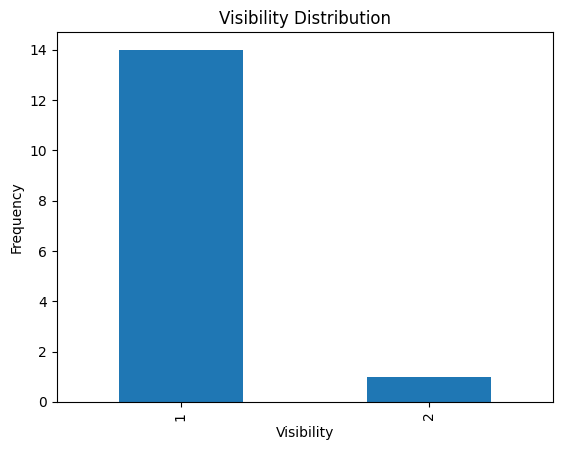

In [ ]:
df_filled['VISIBILITY'].value_counts().plot(kind='bar')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.title('Visibility Distribution')
plt.show()

In [ ]:
#PRINTING THE CORRELATION MATRIX
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                  id     Class  VISIBILITY
id          1.000000  0.440959   -0.433013
Class       0.440959  1.000000    0.218218
VISIBILITY -0.433013  0.218218    1.000000


<ipython-input-25-7a7341cd5616>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
#Performing Predictive analysis on ERROR Using Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

target_variable = 'ERROR'  # Replace 'ERROR' with the desired column name as the target variable

# Remove rows with '?' in the target variable column
df = df[df[target_variable] != '?']

# Convert target variable to numeric
df[target_variable] = pd.to_numeric(df[target_variable])

# Separate features and target variable
X = df.drop([target_variable], axis=1)  # Features
y = df[target_variable]  # Target variable

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


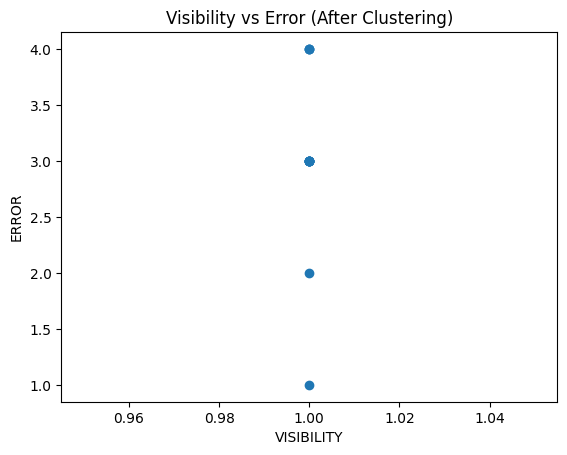

In [ ]:
#Drawing a Kmeans Clustering Graph with K=3
from sklearn.cluster import KMeans



target_variable = 'ERROR'  # Replace 'ERROR' with the desired column name as the target variable

# Remove rows with '?' in the target variable column
df_filled = df_filled[df_filled[target_variable] != '?']

# Convert target variable to numeric
df_filled[target_variable] = pd.to_numeric(df_filled[target_variable])

target_variable = 'VISIBILITY'  # Replace 'ERROR' with the desired column name as the target variable

# Remove rows with '?' in the target variable column
df_filled = df_filled[df_filled[target_variable] != '?']

# Convert target variable to numeric
df_filled[target_variable] = pd.to_numeric(df_filled[target_variable])


features = df_filled[['VISIBILITY', 'ERROR']]  # Features for clustering

# Define the number of clusters
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
df['Cluster'] = cluster_labels

# Step 7: Visualization of 'VISIBILITY' vs 'ERROR' after clustering
plt.scatter(df_filled['VISIBILITY'], df_filled['ERROR'])
plt.xlabel('VISIBILITY')
plt.ylabel('ERROR')
plt.title('Visibility vs Error (After Clustering)')
plt.show()

Conclusion-
We can see that in modern shuttles due to the availability of Radar and other such high technology equipments,the error is not dependent on the visibility